# Road accident Severity Prediction 

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read csv file, skip on every bad line encountered and remove extra space

df = pd.read_csv('Car_Accident_2020.csv', delimiter=';', encoding= 'ISO-8859-1', on_bad_lines='skip', skipinitialspace= True, engine='python')

In [4]:
df.head(5)

,num_boletim,data_hora_boletim,Nº_envolvido,condutor,cod_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,pedestre,passageiro
0,2020-014152383-001,20/03/2020 02:18,1,S,1,NAO FATAL,M,NÃO,NÃO,35,06/09/1984,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,BICICLETA,N,N
1,2020-014152383-001,20/03/2020 02:18,2,S,3,SEM FERIMENTOS,F,SIM,SIM,42,11/03/1978,N,NAO INFORMADO ...,0,0,AUTOMOVEL,N,N
2,2020-014152383-001,20/03/2020 02:18,3,N,3,SEM FERIMENTOS,M,SIM,NÃO,32,20/11/1987,NaN,NaN,0,0,AUTOMOVEL,N,S
3,2020-014158612-001,20/03/2020 05:39,1,N,1,NAO FATAL,F,SIM,NÃO,72,29/06/1947,NaN,NaN,0,0,ONIBUS,N,S
4,2020-014158612-001,20/03/2020 05:39,2,S,3,SEM FERIMENTOS,M,SIM,NÃO,55,13/03/1965,N,NAO INFORMADO ...,0,0,ONIBUS,N,N


# Data Preprocessing

In [5]:
# rename column name with a dictionary that maps the old column names to the new column names
# Portuguese -> English

rename_column = { 'num_boletim' : 'record_number',
                'data_hora_boletim' : 'registration_date_time',
                'Nº_envolvido' : 'people_involved',
                'condutor' : 'driver_responsible',
                 'cod_severidade' : 'severity_code',
                'desc_severidade' : 'fatal',
                'sexo' :'gender' ,
                'cinto_seguranca' : 'seat_belt',
                'Embreagues' : 'under_alcohol',
                'idade' : 'age',
                'nascimento' : 'birth',
                'categoria_habilitacao' : 'enabling_type',
                'descricao_habilitacao' : 'qualification',
                'declaracao_obito' : 'death',
                'cod_severidade_antiga' : 'old_severity_code',
                'especie_veiculo' : 'vehicle_type',
                'pedestre' : 'pedestrian_involve',
                'passageiro' : 'passenger'

}

In [6]:
column_list = list(rename_column.values())

df.columns = column_list

In [7]:
# Trim all string of a database

df_obj = df.select_dtypes(['object'])

df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [8]:
df

,record_number,registration_date_time,people_involved,driver_responsible,severity_code,fatal,gender,seat_belt,under_alcohol,age,birth,enabling_type,qualification,death,old_severity_code,vehicle_type,pedestrian_involve,passenger
0,2020-014152383-001,20/03/2020 02:18,1,S,1,NAO FATAL,M,NÃO,NÃO,35,06/09/1984,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,BICICLETA,N,N
1,2020-014152383-001,20/03/2020 02:18,2,S,3,SEM FERIMENTOS,F,SIM,SIM,42,11/03/1978,N,NAO INFORMADO,0,0,AUTOMOVEL,N,N
2,2020-014152383-001,20/03/2020 02:18,3,N,3,SEM FERIMENTOS,M,SIM,NÃO,32,20/11/1987,NaN,NaN,0,0,AUTOMOVEL,N,S
3,2020-014158612-001,20/03/2020 05:39,1,N,1,NAO FATAL,F,SIM,NÃO,72,29/06/1947,NaN,NaN,0,0,ONIBUS,N,S
4,2020-014158612-001,20/03/2020 05:39,2,S,3,SEM FERIMENTOS,M,SIM,NÃO,55,13/03/1965,N,NAO INFORMADO,0,0,ONIBUS,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22638,2020-060019495-001,14/12/2020 10:15,1,S,3,SEM FERIMENTOS,M,SIM,NÃO,34,14/07/1986,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,N,N
22639,2020-060019495-001,14/12/2020 10:15,2,S,1,NAO FATAL,M,SIM,NÃO,23,20/06/1997,A,"VEÍCULO MOTORIZ. DE 2 OU 3 RODAS, C/ OU S/ CAR...",0,0,MOTOCICLETA,NaN,NaN
22640,2020-060019495-001,14/12/2020 10:15,3,S,3,SEM FERIMENTOS,M,SIM,NÃO,36,13/03/1984,E,"CONJ. VEICULOS ACOPLADOS,QUE NAO SE INCLUE NAS...",0,0,ONIBUS,N,N
22641,2020-060029999-001,13/12/2020 16:20,1,S,3,SEM FERIMENTOS,M,SIM,NÃO,24,13/02/1996,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,N,N


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22643 entries, 0 to 22642
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   record_number           22643 non-null  object
 1   registration_date_time  22643 non-null  object
 2   people_involved         22643 non-null  int64 
 3   driver_responsible      22643 non-null  object
 4   severity_code           22643 non-null  int64 
 5   fatal                   22643 non-null  object
 6   gender                  22643 non-null  object
 7   seat_belt               22643 non-null  object
 8   under_alcohol           22643 non-null  object
 9   age                     22643 non-null  int64 
 10  birth                   22643 non-null  object
 11  enabling_type           19176 non-null  object
 12  qualification           19176 non-null  object
 13  death                   22643 non-null  int64 
 14  old_severity_code       22643 non-null  int64 
 15  ve

In [10]:
df.shape

(22643, 18)

Car accident registration date time

In [11]:
# Extract Month from date time string

df['registration_month'] = pd.to_datetime(df['registration_date_time'], format='%d/%m/%Y %H:%M').dt.month

df = df.drop('registration_date_time', axis=1)

In [12]:
df['registration_month']

0         3
1         3
2         3
3         3
4         3
         ..
22638    12
22639    12
22640    12
22641    12
22642    12
Name: registration_month, Length: 22643, dtype: int64

In [13]:
# Extract num from record number 

df['record_num'] = df['record_number'].str[5:11].astype('category')

df = df.drop('record_number', axis=1)

In [14]:
df['people_involved'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18,
       10], dtype=int64)

In [15]:
df

,people_involved,driver_responsible,severity_code,fatal,gender,seat_belt,under_alcohol,age,birth,enabling_type,qualification,death,old_severity_code,vehicle_type,pedestrian_involve,passenger,registration_month,record_num
0,1,S,1,NAO FATAL,M,NÃO,NÃO,35,06/09/1984,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,BICICLETA,N,N,3,014152
1,2,S,3,SEM FERIMENTOS,F,SIM,SIM,42,11/03/1978,N,NAO INFORMADO,0,0,AUTOMOVEL,N,N,3,014152
2,3,N,3,SEM FERIMENTOS,M,SIM,NÃO,32,20/11/1987,NaN,NaN,0,0,AUTOMOVEL,N,S,3,014152
3,1,N,1,NAO FATAL,F,SIM,NÃO,72,29/06/1947,NaN,NaN,0,0,ONIBUS,N,S,3,014158
4,2,S,3,SEM FERIMENTOS,M,SIM,NÃO,55,13/03/1965,N,NAO INFORMADO,0,0,ONIBUS,N,N,3,014158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22638,1,S,3,SEM FERIMENTOS,M,SIM,NÃO,34,14/07/1986,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,N,N,12,060019
22639,2,S,1,NAO FATAL,M,SIM,NÃO,23,20/06/1997,A,"VEÍCULO MOTORIZ. DE 2 OU 3 RODAS, C/ OU S/ CAR...",0,0,MOTOCICLETA,NaN,NaN,12,060019
22640,3,S,3,SEM FERIMENTOS,M,SIM,NÃO,36,13/03/1984,E,"CONJ. VEICULOS ACOPLADOS,QUE NAO SE INCLUE NAS...",0,0,ONIBUS,N,N,12,060019
22641,1,S,3,SEM FERIMENTOS,M,SIM,NÃO,24,13/02/1996,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,N,N,12,060029


Age Feature

In [16]:
print(sorted(df['age'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]


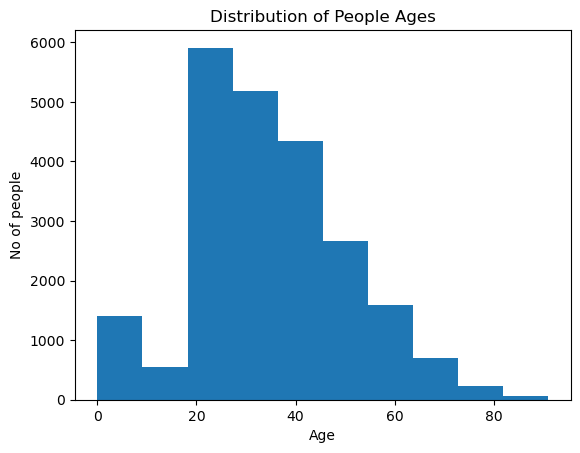

In [17]:
age = df['age']
plt.hist(age)
plt.xlabel('Age')
plt.ylabel('No of people')
plt.title('Distribution of People Ages')
plt.show()

In [18]:
# Make age columns categorical by binning

bins = [i for i in range(0, 101, 10)]

labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [19]:
print(df['age_group'].unique().tolist())

['30-40', '40-50', '70-80', '50-60', '20-30', '10-20', '60-70', nan, '80-90', '0-10', '90-100']


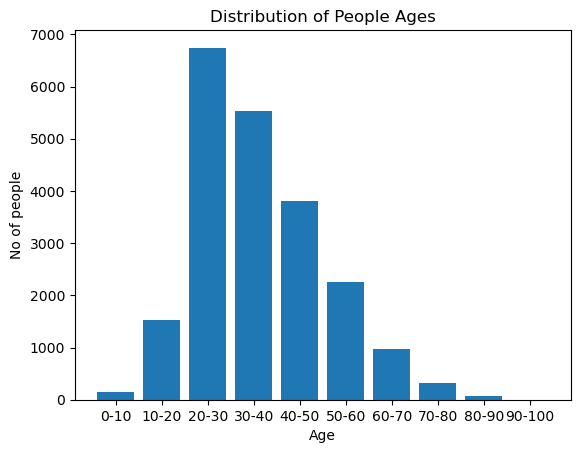

In [20]:
age_group_counts = df['age_group'].value_counts(sort=False)

plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel('Age')
plt.ylabel('No of people')
plt.title('Distribution of People Ages')
plt.show()

In [21]:
# Drop original age 

df = df.drop('age',axis=1)

# Chi-Squared Test

In [22]:
from scipy.stats import chi2_contingency

def chi_square_dependence_test(features : list =None, target_variable : str =None, reject_h0 : float = 0.05) -> list:
    '''
    Param:
    features: dataframe column names, example ['people_involved','gender', 'seat_belt']
    target_variable: feature name, example 'fatal'
    reject_H0: threshold in hypothesis testing

    Function:
    perform chi square test of independence between a list of features and the target feature, return name list of dependent features
    '''

    if features and target_variable is not None:

        dependent_features = []

        for col in df[features]:

            # avoid testing between same column 
            if col != target_variable:

                # Generate cross tabulation to show their relationship
                observed = pd.crosstab(df[col], df[target_variable])

                # Chi-square test of independence of variables in a contingency table.
                chi2, p_val, dof, expected = chi2_contingency(observed)

                # add dependent feature into a list
                if p_val < reject_h0:
                    dependent_features.append(col)
                    
                if p_val < reject_h0:
                    print(f"There is a significant dependency between {str(target_variable)} and {col}. p-value: {round(p_val,2)}")
                else:
                    print(f"There is no significant dependency between {str(target_variable)} and {col}. p-value: {round(p_val,2)}")

        return dependent_features

    else:

        raise TypeError("Features and Target_variable parameter cannot be None")
    

# Data Cleaning

In [23]:
# Find duplicate rows across all columns

duplicateRows = df[df.duplicated()]

duplicateRows.sum()

C:\Users\User\AppData\Local\Temp\ipykernel_16916\3777228218.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  duplicateRows.sum()


people_involved                   2
driver_responsible                S
severity_code                     0
fatal                 NAO INFORMADO
gender                            0
seat_belt                       NÃO
under_alcohol         NÃO INFORMADO
birth                    00/00/0000
enabling_type                     N
qualification         NAO INFORMADO
death                             0
old_severity_code                 0
vehicle_type              AUTOMOVEL
pedestrian_involve                0
passenger                         0
registration_month                3
dtype: object

In [24]:
df.loc[:,['death','old_severity_code']]

,death,old_severity_code
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
22638,0,0
22639,0,0
22640,0,0
22641,0,0


In [25]:
# Get all columns that have constant value / have same values across all rows for each column.

constant_columns = df.columns[df.nunique() <= 1]

# Drop columns with only one distinct value

for col in constant_columns:
    print(f"drop column: {col} ; value: {df[col].unique()}")
   
df.drop(constant_columns,inplace=True,axis=1)

drop column: death ; value: [0]
drop column: old_severity_code ; value: [0]


In [26]:
missing_values_list = ['NAO INFORMADO','NÃO INFORMADO']

# checking whether any columns in the df contain any of the strings in the missing_values_list, output boolean with any function
nao_informado = df.apply(lambda x: x.astype(str).str.contains('|'.join(missing_values_list)).any())

nao_informado

people_involved       False
driver_responsible    False
severity_code         False
fatal                  True
gender                False
seat_belt             False
under_alcohol          True
birth                 False
enabling_type         False
qualification          True
vehicle_type           True
pedestrian_involve    False
passenger             False
registration_month    False
record_num            False
age_group             False
dtype: bool

In [27]:
# Get columns with nao informado string by boolean indexing and convert it to a list
nao_informado_cols = nao_informado[nao_informado == True].index.tolist()

# Convert string in missing_values_list to np.nan
df[nao_informado_cols] = df[nao_informado_cols].replace(missing_values_list, np.nan)

In [28]:
df.isnull().any()

people_involved       False
driver_responsible    False
severity_code         False
fatal                  True
gender                False
seat_belt             False
under_alcohol          True
birth                 False
enabling_type          True
qualification          True
vehicle_type           True
pedestrian_involve     True
passenger              True
registration_month    False
record_num            False
age_group              True
dtype: bool

In [29]:
# Check Porpotion of missing values

def missing_value_prop() -> None:

    percent_missing = df.isnull().sum() * 100 / len(df)

    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

    missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)

    print(missing_value_df)

In [30]:
missing_value_prop()

                    percent_missing
qualification             33.348055
enabling_type             15.311575
pedestrian_involve         9.512874
passenger                  9.031489
under_alcohol              5.820783
age_group                  5.644128
vehicle_type               5.582299
fatal                      2.861812
people_involved            0.000000
driver_responsible         0.000000
severity_code              0.000000
gender                     0.000000
seat_belt                  0.000000
birth                      0.000000
registration_month         0.000000
record_num                 0.000000


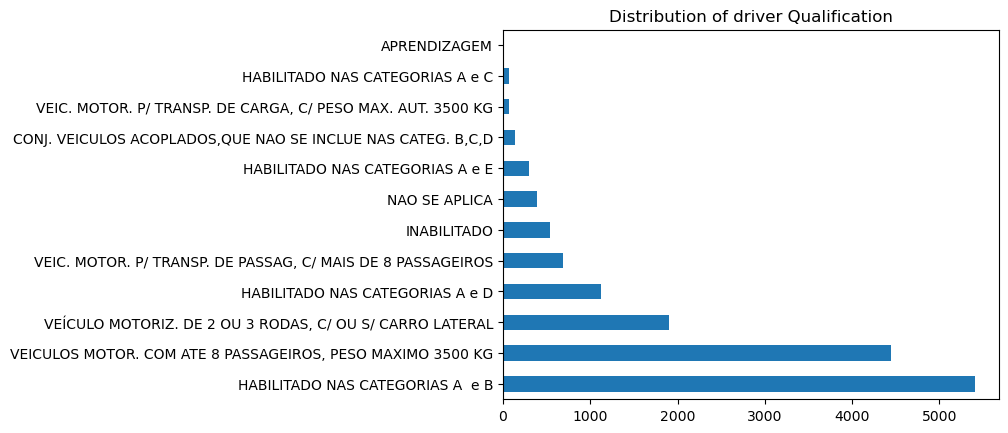

In [31]:
df['qualification'].value_counts().plot(kind='barh')

plt.title('Distribution of driver Qualification')
plt.show()

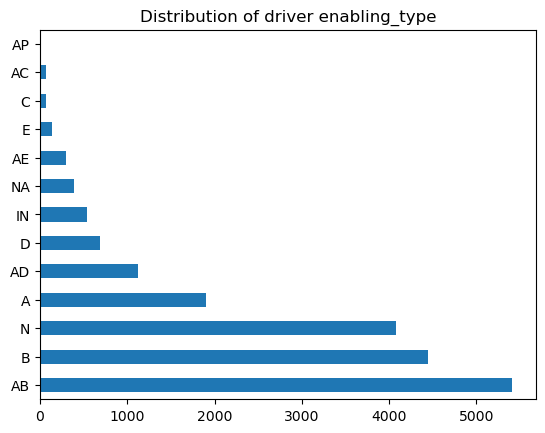

In [32]:
df['enabling_type'].value_counts().plot(kind='barh')

plt.title('Distribution of driver enabling_type')
plt.show()

In [33]:
missing_values_cols = chi_square_dependence_test(features=['qualification', 'enabling_type'], target_variable='fatal')

There is a significant dependency between fatal and qualification. p-value: 0.0
There is a significant dependency between fatal and enabling_type. p-value: 0.0


In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

for col in missing_values_cols:

    df[col] = imputer.fit_transform(df[col].values.reshape(-1,1))[:,0]
    

Gender Feature Missing value

In [35]:
df['gender'].value_counts()

M    17351
F     4727
0      565
Name: gender, dtype: int64

In [36]:
df['gender'] = df['gender'].replace('0', np.nan)

In [37]:
df['gender'].value_counts()

M    17351
F     4727
Name: gender, dtype: int64

In [38]:
missing_value_prop()

                    percent_missing
pedestrian_involve         9.512874
passenger                  9.031489
under_alcohol              5.820783
age_group                  5.644128
vehicle_type               5.582299
fatal                      2.861812
gender                     2.495252
people_involved            0.000000
driver_responsible         0.000000
severity_code              0.000000
seat_belt                  0.000000
birth                      0.000000
enabling_type              0.000000
qualification              0.000000
registration_month         0.000000
record_num                 0.000000


In [39]:
df.shape

(22643, 16)

In [40]:
# List of columns with missing values

columns_with_missing_values = df.columns[df.isnull().sum() > 0].tolist()

In [41]:
print(columns_with_missing_values)

['fatal', 'gender', 'under_alcohol', 'vehicle_type', 'pedestrian_involve', 'passenger', 'age_group']


In [42]:
# Drop rows with missing values

df.dropna(subset = columns_with_missing_values, inplace=True)

In [43]:
missing_value_prop()

                    percent_missing
people_involved                 0.0
driver_responsible              0.0
severity_code                   0.0
fatal                           0.0
gender                          0.0
seat_belt                       0.0
under_alcohol                   0.0
birth                           0.0
enabling_type                   0.0
qualification                   0.0
vehicle_type                    0.0
pedestrian_involve              0.0
passenger                       0.0
registration_month              0.0
record_num                      0.0
age_group                       0.0


In [44]:
df.shape

(19152, 16)

In [45]:
def plot_stacked_bar_chart(x : str, y : str, title : str =None, normalize ='index') -> None:

    ct = pd.crosstab(df[x], df[y], normalize=normalize)

    ax = ct.plot(kind='bar', stacked=True)

    ax.set_xlabel(x)
    ax.set_ylabel(y)

    ax.legend(title=title)

    plt.show()

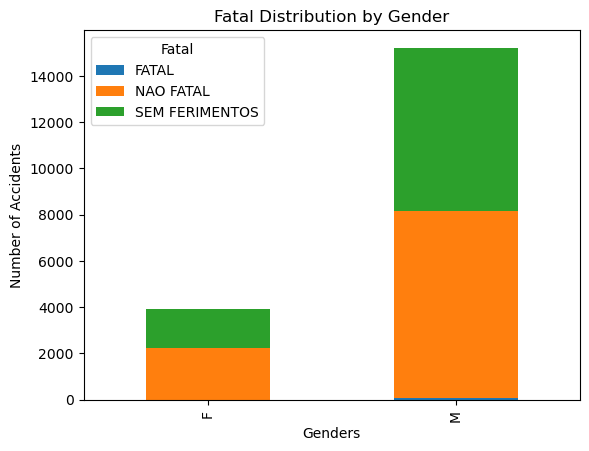

In [46]:
pivot_table = df.pivot_table(index='gender', columns='fatal', aggfunc='size')

pivot_table.plot(kind='bar', stacked=True)

plt.xlabel('Genders')
plt.ylabel('Number of Accidents')
plt.title('Fatal Distribution by Gender')
plt.legend(title='Fatal')

plt.show()

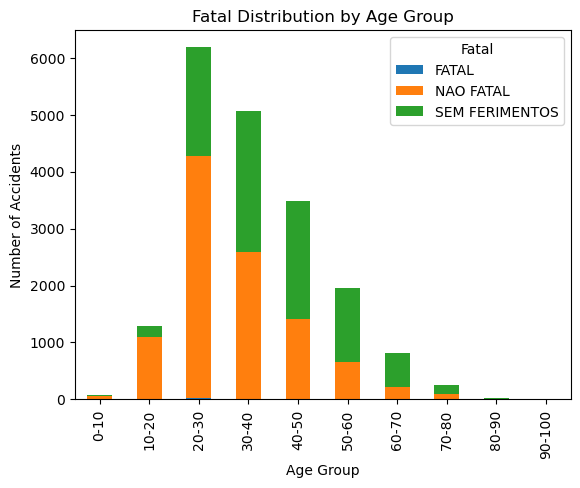

In [47]:
pivot_table = df.pivot_table(index='age_group', columns='fatal', aggfunc='size')

pivot_table.plot(kind='bar', stacked=True)

plt.xlabel('Age Group')
plt.ylabel('Number of Accidents')
plt.title('Fatal Distribution by Age Group')
plt.legend(title='Fatal')

plt.show()

In [48]:
df['fatal'].value_counts(normalize=True)

NAO FATAL         0.539839
SEM FERIMENTOS    0.456819
FATAL             0.003342
Name: fatal, dtype: float64

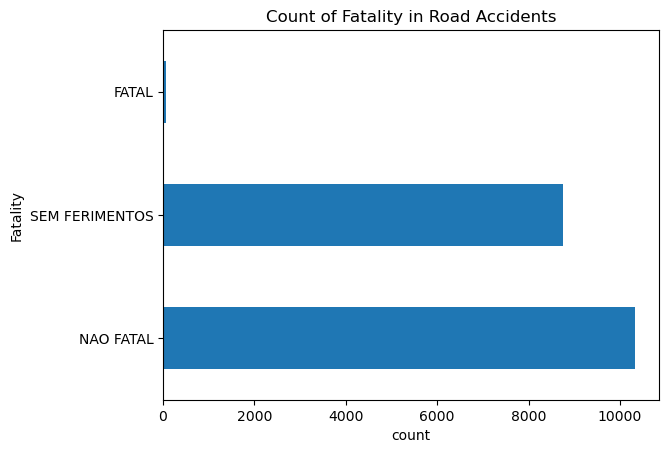

In [49]:
df['fatal'].value_counts().plot(kind='barh')

plt.title('Count of Fatality in Road Accidents')
plt.ylabel('Fatality')
plt.xlabel('count')
plt.show()

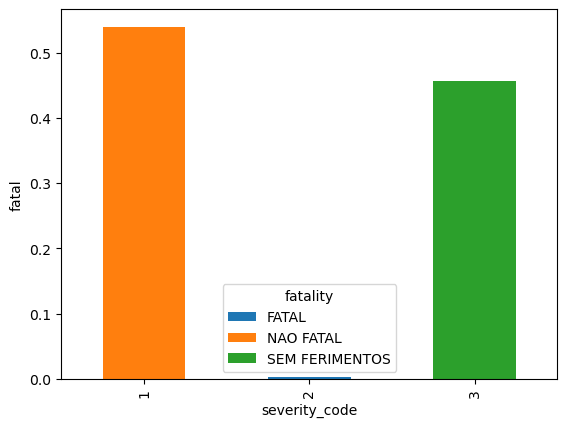

In [50]:
plot_stacked_bar_chart(x='severity_code', y='fatal', title='fatality', normalize='all')

In [51]:
chi_square_dependence_test(features=['severity_code'], target_variable='fatal')

There is a significant dependency between fatal and severity_code. p-value: 0.0


['severity_code']

In [52]:
# Severity code contains information of target variable, drop it to avoid target leakage

df = df.drop('severity_code', axis=1)

# Feature Selection

In [53]:
df.head()

,people_involved,driver_responsible,fatal,gender,seat_belt,under_alcohol,birth,enabling_type,qualification,vehicle_type,pedestrian_involve,passenger,registration_month,record_num,age_group
0,1,S,NAO FATAL,M,NÃO,NÃO,06/09/1984,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",BICICLETA,N,N,3,014152,30-40
1,2,S,SEM FERIMENTOS,F,SIM,SIM,11/03/1978,N,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,N,N,3,014152,40-50
2,3,N,SEM FERIMENTOS,M,SIM,NÃO,20/11/1987,AB,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,N,S,3,014152,30-40
3,1,N,NAO FATAL,F,SIM,NÃO,29/06/1947,AB,HABILITADO NAS CATEGORIAS A e B,ONIBUS,N,S,3,014158,70-80
4,2,S,SEM FERIMENTOS,M,SIM,NÃO,13/03/1965,N,HABILITADO NAS CATEGORIAS A e B,ONIBUS,N,N,3,014158,50-60


In [54]:
dependent_features = chi_square_dependence_test(features=df.columns.to_list(), target_variable='fatal')

There is a significant dependency between fatal and people_involved. p-value: 0.0
There is a significant dependency between fatal and driver_responsible. p-value: 0.0
There is a significant dependency between fatal and gender. p-value: 0.0
There is a significant dependency between fatal and seat_belt. p-value: 0.0
There is no significant dependency between fatal and under_alcohol. p-value: 0.58
There is no significant dependency between fatal and birth. p-value: 0.95
There is a significant dependency between fatal and enabling_type. p-value: 0.0
There is a significant dependency between fatal and qualification. p-value: 0.0
There is a significant dependency between fatal and vehicle_type. p-value: 0.0
There is no significant dependency between fatal and pedestrian_involve. p-value: 0.65
There is a significant dependency between fatal and passenger. p-value: 0.0
There is no significant dependency between fatal and registration_month. p-value: 0.09
There is no significant dependency betw

In [55]:
df[dependent_features].head()

,people_involved,driver_responsible,gender,seat_belt,enabling_type,qualification,vehicle_type,passenger,age_group
0,1,S,M,NÃO,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",BICICLETA,N,30-40
1,2,S,F,SIM,N,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,N,40-50
2,3,N,M,SIM,AB,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,S,30-40
3,1,N,F,SIM,AB,HABILITADO NAS CATEGORIAS A e B,ONIBUS,S,70-80
4,2,S,M,SIM,N,HABILITADO NAS CATEGORIAS A e B,ONIBUS,N,50-60


In [56]:
chi_square_dependence_test(features=['birth','age_group'], target_variable='fatal')

There is no significant dependency between fatal and birth. p-value: 0.95
There is a significant dependency between fatal and age_group. p-value: 0.0


['age_group']

In [57]:
chi_square_dependence_test(features=['birth'], target_variable='age_group')

There is a significant dependency between age_group and birth. p-value: 0.0


['birth']

In [58]:
# Remove birth column to reduce redundancy

df = df.drop('birth', axis=1)

In [59]:
target_variable = 'fatal'

X = df[dependent_features]

# X = df.drop('fatal', axis=1)

y = df[target_variable]

In [60]:
X

,people_involved,driver_responsible,gender,seat_belt,enabling_type,qualification,vehicle_type,passenger,age_group
0,1,S,M,NÃO,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",BICICLETA,N,30-40
1,2,S,F,SIM,N,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,N,40-50
2,3,N,M,SIM,AB,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,S,30-40
3,1,N,F,SIM,AB,HABILITADO NAS CATEGORIAS A e B,ONIBUS,S,70-80
4,2,S,M,SIM,N,HABILITADO NAS CATEGORIAS A e B,ONIBUS,N,50-60
...,...,...,...,...,...,...,...,...,...
22635,2,S,M,SIM,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",AUTOMOVEL,N,30-40
22637,2,S,M,SIM,N,HABILITADO NAS CATEGORIAS A e B,AUTOMOVEL,N,20-30
22638,1,S,M,SIM,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",AUTOMOVEL,N,30-40
22640,3,S,M,SIM,E,"CONJ. VEICULOS ACOPLADOS,QUE NAO SE INCLUE NAS...",ONIBUS,N,30-40


# Data Encoding

In [61]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

ohe.fit(X)

feature_names = ohe.get_feature_names_out(input_features=X.columns)

X_encoded = pd.DataFrame(ohe.transform(X), columns=feature_names)

In [62]:
print(X_encoded.columns.to_list())

['people_involved_1', 'people_involved_2', 'people_involved_3', 'people_involved_4', 'people_involved_5', 'people_involved_6', 'people_involved_7', 'people_involved_8', 'people_involved_9', 'people_involved_10', 'people_involved_11', 'people_involved_12', 'people_involved_13', 'people_involved_14', 'people_involved_15', 'people_involved_16', 'people_involved_17', 'driver_responsible_N', 'driver_responsible_S', 'gender_F', 'gender_M', 'seat_belt_NÃO', 'seat_belt_SIM', 'enabling_type_A', 'enabling_type_AB', 'enabling_type_AC', 'enabling_type_AD', 'enabling_type_AE', 'enabling_type_AP', 'enabling_type_B', 'enabling_type_C', 'enabling_type_D', 'enabling_type_E', 'enabling_type_IN', 'enabling_type_N', 'enabling_type_NA', 'qualification_APRENDIZAGEM', 'qualification_CONJ. VEICULOS ACOPLADOS,QUE NAO SE INCLUE NAS CATEG. B,C,D', 'qualification_HABILITADO NAS CATEGORIAS A  e B', 'qualification_HABILITADO NAS CATEGORIAS A e C', 'qualification_HABILITADO NAS CATEGORIAS A e D', 'qualification_HABI

In [63]:
X_encoded

,people_involved_1,people_involved_2,people_involved_3,people_involved_4,people_involved_5,people_involved_6,people_involved_7,people_involved_8,people_involved_9,people_involved_10,...,age_group_0-10,age_group_10-20,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70-80,age_group_80-90,age_group_90-100
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19148,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19149,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19150,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
y_encoded = pd.Series(lb.fit_transform(y))

print("Encoded labels:",lb.classes_)

Encoded labels: ['FATAL' 'NAO FATAL' 'SEM FERIMENTOS']


In [65]:
y_encoded

0        1
1        2
2        2
3        1
4        2
        ..
19147    2
19148    2
19149    2
19150    2
19151    2
Length: 19152, dtype: int32

In [66]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=5)
X_selected = selector.fit_transform(X_encoded, y_encoded)

# extract column name of selected features
cols = selector.get_feature_names_out()

# convert selected features into dataframe
feature_selection_df = pd.DataFrame(X_selected, columns=cols)

In [67]:
feature_selection_df

,driver_responsible_N,enabling_type_B,"qualification_VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MAXIMO 3500 KG",vehicle_type_AUTOMOVEL,vehicle_type_MOTOCICLETA
0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
19147,0.0,1.0,1.0,1.0,0.0
19148,0.0,0.0,0.0,1.0,0.0
19149,0.0,1.0,1.0,1.0,0.0
19150,0.0,0.0,0.0,0.0,0.0


# Train Validation Test Split

In [68]:
from sklearn.model_selection import train_test_split

# Train Test Split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling

In [69]:
import sys

!{sys.executable} -m pip install imbalanced-learn

In [70]:
from imblearn.over_sampling import SMOTE, SMOTEN

# Generate synthetic samples for the minority class
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTEN.html#:~:text=Synthetic%20Minority%20Over%2Dsampling%20Technique,more%20in%20the%20User%20Guide.

smoten = SMOTEN()

X_train_resampled, y_train_resampled = smoten.fit_resample(feature_selection_df, y_encoded)

In [71]:
X_train_resampled.shape, y_train_resampled.shape

((31017, 5), (31017,))

In [72]:
print(y_train_resampled.value_counts())

1    10339
2    10339
0    10339
dtype: int64


# Machine Learning

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, f1_score, make_scorer, auc

In [74]:
from sklearn.model_selection import StratifiedKFold

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [75]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

# f1_weighted computes the F1 score for each class independently and then takes the weighted mean based on the number of samples in each class.
# f1_macro computes the F1 score for each class independently and then takes the unweighted mean.

f1_scoring_weighted = make_scorer(f1_score, average='weighted')

In [76]:
def plot_classification_report_heatmap(y_test, y_pred, title='Classification Report') -> None:

    clf = classification_report(y_test, y_pred, target_names=['Fatal', 'Non Fatal', 'No injuries'], zero_division=0, output_dict=True)

    ax = plt.axes()

    # Create Classification Report 
    sns.heatmap(pd.DataFrame(clf).iloc[:-1, :].T, annot=True, cmap="Blues")

    ax.set_title(title)
    plt.show()

In [77]:
def plot_confusion_matrix(cf, title : str ='Confusion Matrix', normalize : bool =False) -> None:

    if normalize is True:
        # Normalize confusion Matrix
        cnf_matrix_n = cf.astype('float') / cf.sum(axis=1)[:, np.newaxis]
        format = '.2g'
    else:
        cnf_matrix_n = cf
        format = 'g'

    class_names=['Fatal', 'Non Fatal', 'No injuries']
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))

    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix_n), annot=True, fmt=format, cmap="YlGnBu")

    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()

    plt.title(title , y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.show()

In [78]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# SVM

In [79]:
from imblearn.pipeline import Pipeline as imb_pipeline
from sklearn.svm import SVC

In [80]:
pipeline = imb_pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('sampling', SMOTEN()),
    ('classifier', SVC(random_state=42))
])

In [81]:
pipeline.fit(X_train, y_train)

svc_y_pred = pipeline.predict(X_test)

print('SVM Accuracy Score:',accuracy_score(y_test, svc_y_pred))

svc_f1 = f1_score(y_test, svc_y_pred, average='weighted')
print("SVM F1 Score:", svc_f1)

SVM Accuracy Score: 0.6846776298616549
SVM F1 Score: 0.7377229853102333


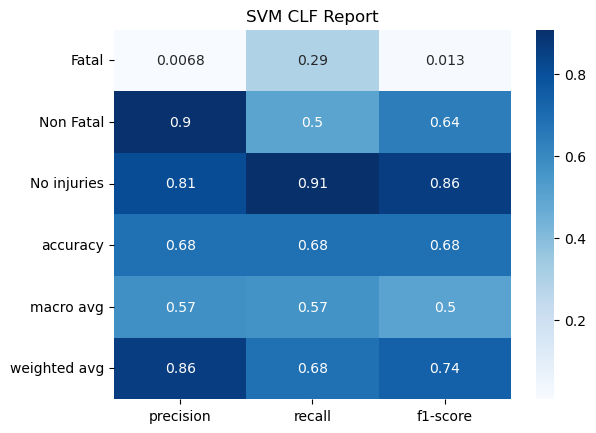

In [82]:
plot_classification_report_heatmap(y_test, svc_y_pred, title='SVM CLF Report')

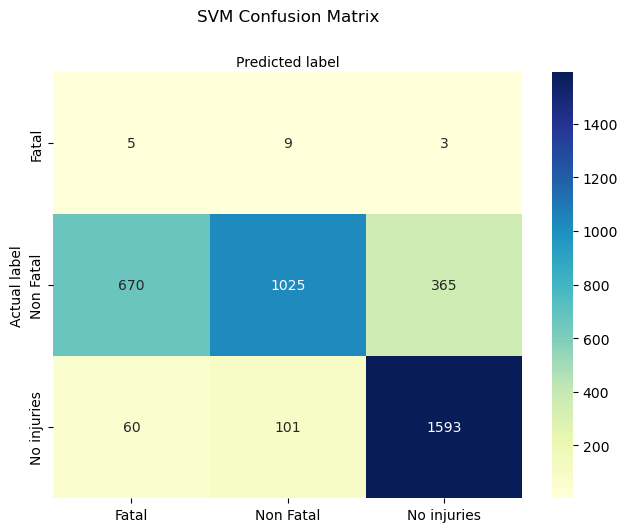

In [83]:
cnf_matrix_svm = confusion_matrix(y_test, svc_y_pred)

plot_confusion_matrix(cnf_matrix_svm, title='SVM Confusion Matrix', normalize=False)

# SVM With Hyperparameters Tuning

In [84]:
pipeline = imb_pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('classifier', SVC(random_state=42))
])

In [85]:
hyperparameters = {
    'feature_selection__k': [5, 10, 15, 20, 30, 40, 'all'],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
    'classifier__kernel': ['linear', 'poly', 'rbf']
}

In [87]:
from sklearn.model_selection import GridSearchCV

In [87]:
# Cross Validation and hyperparameters tuning

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/modules/model_evaluation.html 

grid_search = GridSearchCV(pipeline, hyperparameters, cv=stratified_kfold, scoring=f1_scoring_weighted, n_jobs=4)
grid_search.fit(X_train, y_train)

svc_test_score = grid_search.score(X_test, y_test)
print("Test score:", svc_test_score)

svc_best_params = grid_search.best_params_
print("Best hyperparameters: ", svc_best_params)

best_model_svm = grid_search.best_estimator_

Test score: 0.8778354239129122
Best hyperparameters:  {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'poly', 'feature_selection__k': 'all'}


In [88]:
svc_pipeline = imb_pipeline([
    ('preprocessor', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2, k=svc_best_params['feature_selection__k'])),
    ('sampling', SMOTEN()),
    ('classifier', best_model_svm)
])

In [89]:
svc_pipeline.fit(X_train, y_train)

svc_y_pred = svc_pipeline.predict(X_test)

print('SVM with Tuning Accuracy score:',accuracy_score(y_test, svc_y_pred))

svc_f1 = f1_score(y_test, svc_y_pred, average='weighted')
print("SVM with Tuning F1 Score:", svc_f1)

SVM with Tuning Accuracy score: 0.8504306969459671
SVM with Tuning F1 Score: 0.8608442989818739


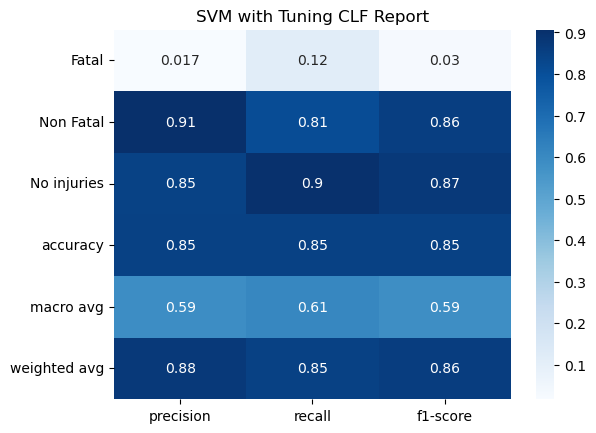

In [90]:
plot_classification_report_heatmap(y_test, svc_y_pred, title='SVM with Tuning CLF Report')

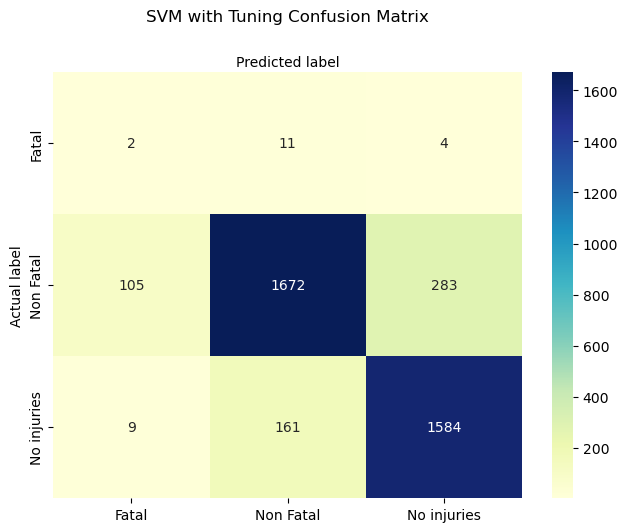

In [91]:
cnf_matrix_svm = confusion_matrix(y_test, svc_y_pred)

plot_confusion_matrix(cnf_matrix_svm, title='SVM with Tuning Confusion Matrix', normalize=False)

# Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

pipeline = imb_pipeline([
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('sampling', SMOTEN()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [93]:
pipeline.fit(X_train, y_train)

decision_tree_y_pred = pipeline.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)
print('Decision Tree Accuracy Score:', decision_tree_accuracy)

decision_tree_f1 = f1_score(y_test, decision_tree_y_pred, average='weighted')
print("Decision Tree F1 score:", decision_tree_f1)

Decision Tree Accuracy Score: 0.6846776298616549
Decision Tree F1 score: 0.7377229853102333


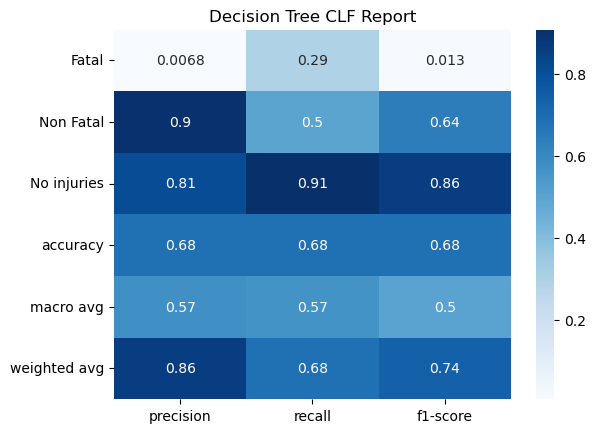

In [94]:
plot_classification_report_heatmap(y_test, decision_tree_y_pred, title='Decision Tree CLF Report')

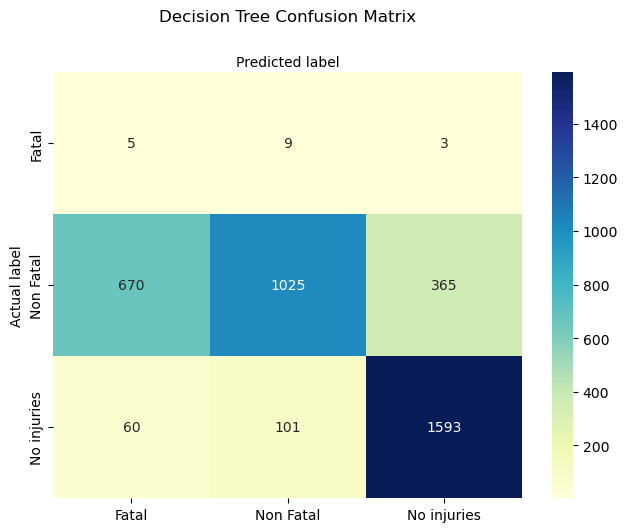

In [95]:
cnf_matrix_dt = confusion_matrix(y_test, decision_tree_y_pred)

plot_confusion_matrix(cnf_matrix_dt, title='Decision Tree Confusion Matrix', normalize=False)

# Decision Tree with Hyperparameters Tuning

In [96]:
pipeline = imb_pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [97]:
hyperparameters = {
    'feature_selection__k': [5, 10, 15, 20, 25, 30, 35, 'all'],
    'classifier__max_depth': [None, 5, 10, 20, 50],
    'classifier__max_features': ['auto', 'sqrt', 'log2', None],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__class_weight': ['balanced', None]
}

In [98]:
grid_search = GridSearchCV(pipeline, hyperparameters, cv=stratified_kfold, scoring=f1_scoring_weighted, n_jobs=4)

grid_search.fit(X_train, y_train)

decision_tree_test_score = grid_search.score(X_test, y_test)
print("Test score:", decision_tree_test_score)

decision_tree_best_params = grid_search.best_params_
print("Best hyperparameters: ", decision_tree_best_params)

best_model_decision_tree = grid_search.best_estimator_

Test score: 0.8770555109312884
Best hyperparameters:  {'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': None, 'feature_selection__k': 30}


In [99]:
decision_tree_pipeline = imb_pipeline([
    ('preprocessor', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2, k=decision_tree_best_params['feature_selection__k'])),
    ('sampling', SMOTEN()),
    ('classifier', best_model_decision_tree)
])

In [100]:
decision_tree_pipeline.fit(X_train, y_train)

decision_tree_y_pred = decision_tree_pipeline.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)
print('Decision Tree with tuning Accuracy Score:', decision_tree_accuracy)

decision_tree_f1 = f1_score(y_test, decision_tree_y_pred, average='weighted')
print("Decision Tree with tuning F1 score:", decision_tree_f1)

Decision Tree with tuning Accuracy Score: 0.70817019055077
Decision Tree with tuning F1 score: 0.7800822199692694


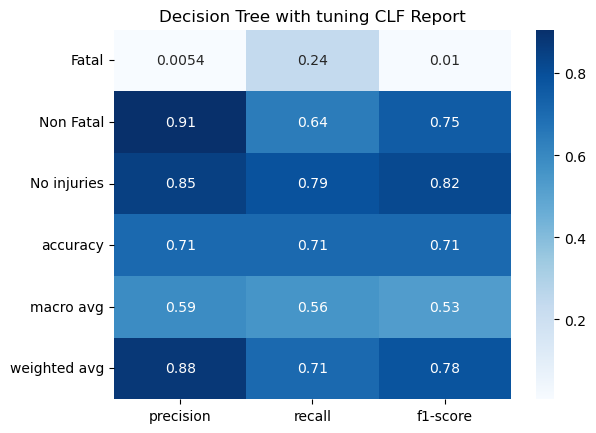

In [101]:
plot_classification_report_heatmap(y_test, decision_tree_y_pred, title='Decision Tree with tuning CLF Report')

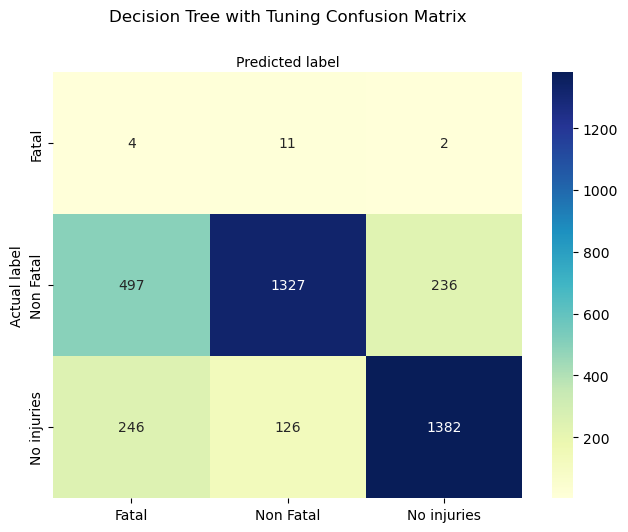

In [102]:
cnf_matrix_dt = confusion_matrix(y_test, decision_tree_y_pred)

plot_confusion_matrix(cnf_matrix_dt, title='Decision Tree with Tuning Confusion Matrix', normalize=False)

# Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

pipeline = imb_pipeline([
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('sampling', SMOTEN()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [104]:
pipeline.fit(X_train, y_train)

random_forest_y_pred = pipeline.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
print('Random Forest Accuracy Score:', random_forest_accuracy)

random_forest_f1 = f1_score(y_test, random_forest_y_pred, average='weighted')
print("Random Forest F1 Score:", random_forest_f1)

Random Forest Accuracy Score: 0.6846776298616549
Random Forest F1 Score: 0.7377229853102333


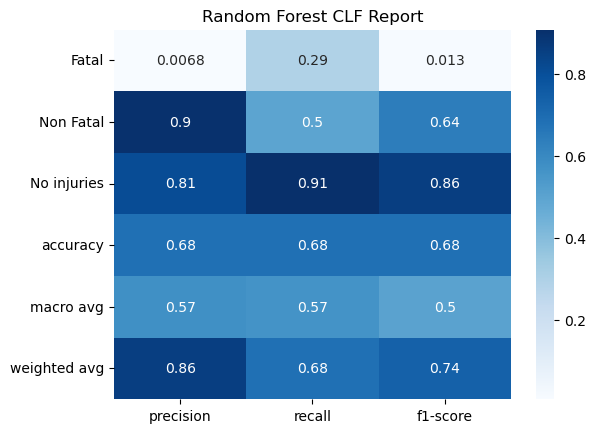

In [105]:
plot_classification_report_heatmap(y_test, random_forest_y_pred, title='Random Forest CLF Report')

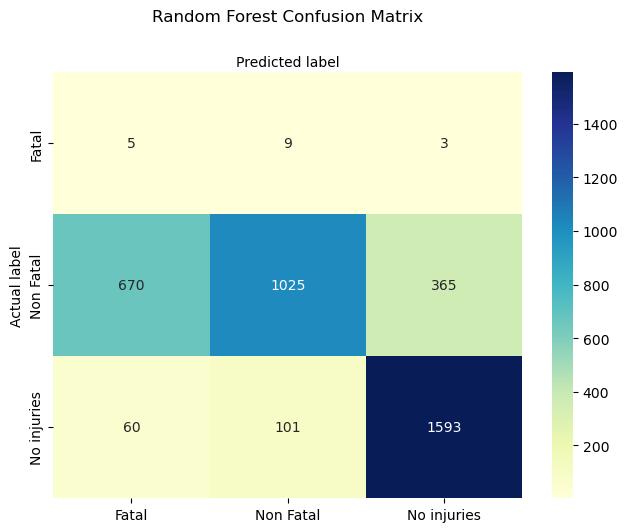

In [106]:
cnf_matrix_rf = confusion_matrix(y_test, random_forest_y_pred)

plot_confusion_matrix(cnf_matrix_rf, title='Random Forest Confusion Matrix', normalize=False)

# Random Forest With Hyperparameters Tuning

In [107]:
pipeline = imb_pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [108]:
hyperparameters = {
    'feature_selection__k': [5, 10, 15, 20, 30, 40, 'all'],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 12, 13, 15, 18, 20],
    'classifier__min_samples_split': [ 30, 35, 40],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__class_weight': ['balanced', 'balanced_subsample', None]
}

In [109]:
grid_search = GridSearchCV(pipeline, hyperparameters, cv=stratified_kfold, scoring=f1_scoring_weighted, n_jobs=4)

grid_search.fit(X_train, y_train)

random_forest_test_score = grid_search.score(X_test, y_test)
print("Test score:", random_forest_test_score)

random_forest_best_params = grid_search.best_params_
print("Best hyperparameters: ", random_forest_best_params)

best_model_random_forest = grid_search.best_estimator_

In [ ]:
random_forest_pipeline = imb_pipeline([
    ('preprocessor', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2, k=random_forest_best_params['feature_selection__k'])),
    ('sampling', SMOTEN()),
    ('classifier', best_model_random_forest)
])

In [ ]:
random_forest_pipeline.fit(X_train, y_train)

random_forest_y_pred = random_forest_pipeline.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
print('Random Forest with tuning Accuracy Score:', random_forest_accuracy)

random_forest_f1 = f1_score(y_test, random_forest_y_pred, average='weighted')
print("Random Forest with tuning F1 Score:", random_forest_f1)

Random Forest with tuning Accuracy Score: 0.852257896110676
Random Forest with tuning F1 Score: 0.8631345722495094


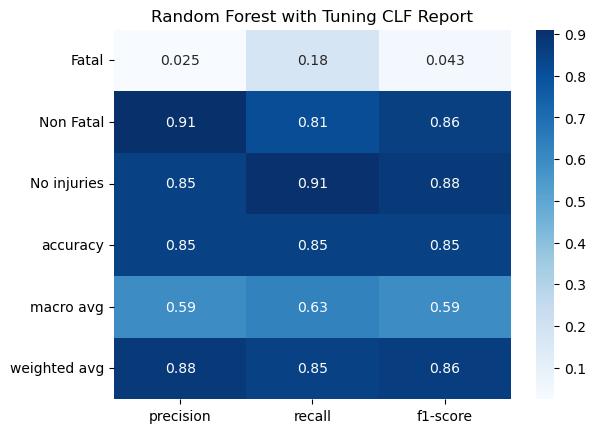

In [ ]:
plot_classification_report_heatmap(y_test, random_forest_y_pred, title='Random Forest with Tuning CLF Report')

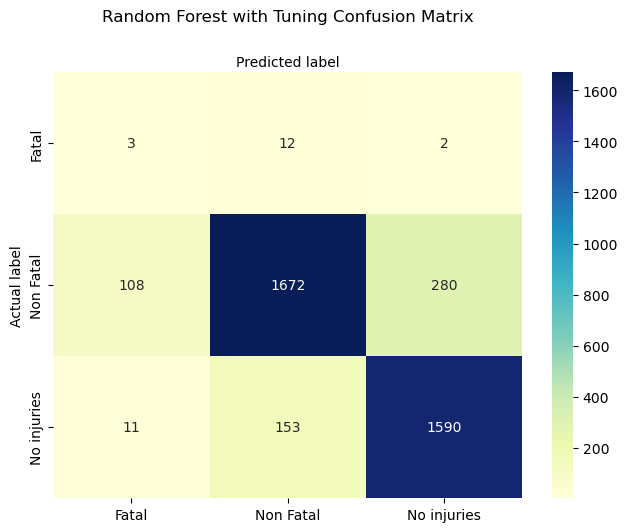

In [ ]:
cnf_matrix_rf = confusion_matrix(y_test, random_forest_y_pred)

plot_confusion_matrix(cnf_matrix_rf, title='Random Forest with Tuning Confusion Matrix', normalize=False)

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

pipeline = imb_pipeline([
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('sampling', SMOTEN()),
    ('classifier', LogisticRegression(random_state=42))
])

In [81]:
pipeline.fit(X_train, y_train)

logistic_regression_y_pred = pipeline.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_y_pred)
print("Logistic Regression Accuracy Score:", logistic_regression_accuracy)

logistic_regression_f1 = f1_score(y_test, logistic_regression_y_pred, average='weighted')
print("Logistic Regression F1 Score:", logistic_regression_f1)

Logistic Regression Accuracy Score: 0.68572174367006
Logistic Regression F1 Score: 0.7406574490156521


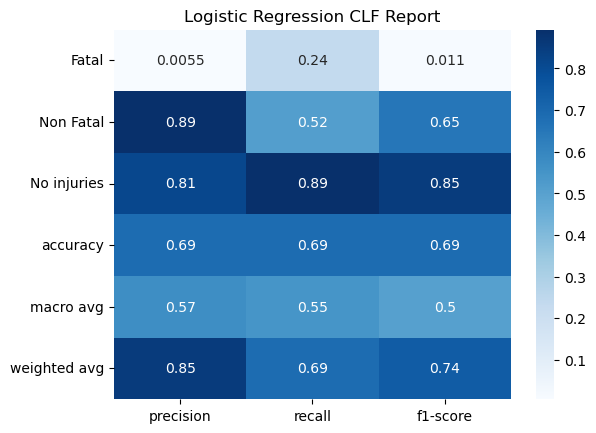

In [82]:
plot_classification_report_heatmap(y_test, logistic_regression_y_pred, title='Logistic Regression CLF Report')

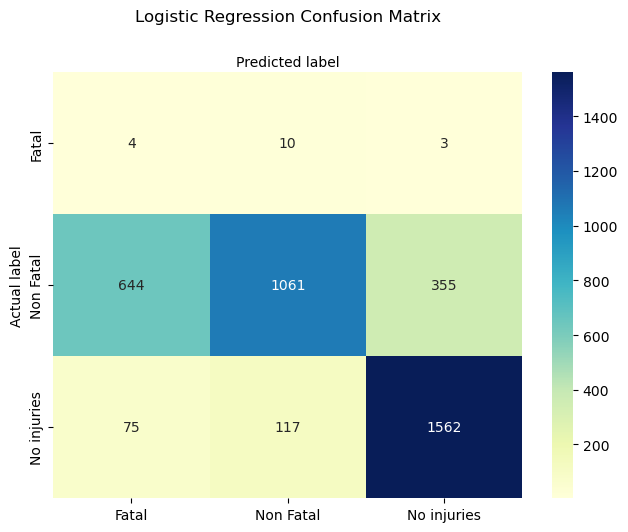

In [83]:
cnf_matrix_lr = confusion_matrix(y_test, logistic_regression_y_pred)

plot_confusion_matrix(cnf_matrix_lr, title='Logistic Regression Confusion Matrix', normalize=False)

# Logistic Regression with Hyperparameters Tuning

In [84]:
pipeline = imb_pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2)),
    ('classifier', LogisticRegression(random_state=42))
])

In [85]:
hyperparameters = {
    'feature_selection__k': [5, 10, 15, 20, 30, 40, 'all'],
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['newton-cg', 'lbfgs'],
    'classifier__multi_class': ['auto', 'ovr', 'multinomial'],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__max_iter': [100, 200, 300]}

In [88]:
grid_search = GridSearchCV(pipeline, hyperparameters, cv=stratified_kfold, scoring=f1_scoring_weighted, n_jobs=4)

grid_search.fit(X_train, y_train)

logistic_regression_test_score = grid_search.score(X_test, y_test)
print("Test score:", logistic_regression_test_score)

logistic_regression_best_params = grid_search.best_params_
print("Best hyperparameters: ", logistic_regression_best_params)

best_model_logistic_regression = grid_search.best_estimator_

Test score: 0.8778354239129122
Best hyperparameters:  {'classifier__C': 1.0, 'classifier__class_weight': None, 'classifier__max_iter': 100, 'classifier__multi_class': 'auto', 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg', 'feature_selection__k': 'all'}


In [89]:
logistic_regression_pipeline = imb_pipeline([
    ('preprocessor', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('feature_selection', SelectKBest(chi2, k=logistic_regression_best_params['feature_selection__k'])),
    ('sampling', SMOTEN()),
    ('classifier', best_model_logistic_regression)
])

In [90]:
logistic_regression_pipeline.fit(X_train, y_train)

logistic_regression_y_pred = logistic_regression_pipeline.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_y_pred)
print("Logistic Regression with tuning Accuracy Score:", logistic_regression_accuracy)

logistic_regression_f1 = f1_score(y_test, logistic_regression_y_pred, average='weighted')
print("Logistic Regression with tuning F1 Score:", logistic_regression_f1)

Logistic Regression with tuning Accuracy Score: 0.8645262333594361
Logistic Regression with tuning F1 Score: 0.8698752121700335


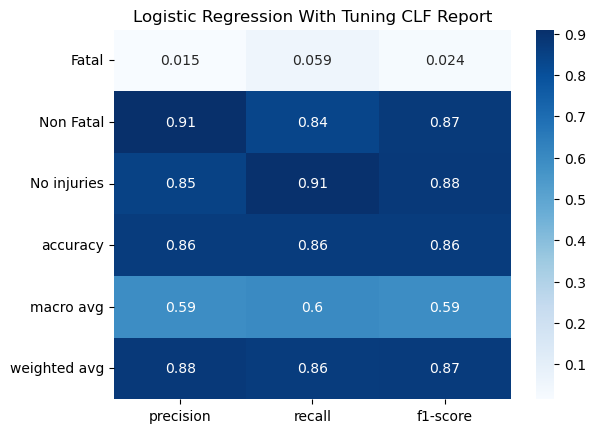

In [91]:
plot_classification_report_heatmap(y_test, logistic_regression_y_pred, title='Logistic Regression With Tuning CLF Report')

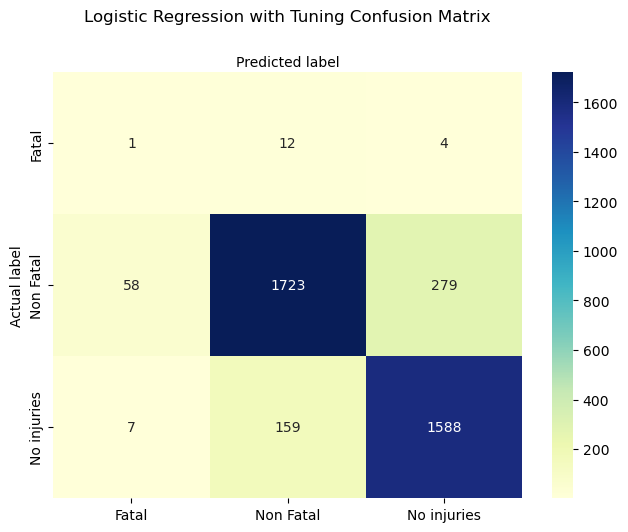

In [92]:
cnf_matrix_lr = confusion_matrix(y_test, logistic_regression_y_pred)

plot_confusion_matrix(cnf_matrix_lr, title='Logistic Regression with Tuning Confusion Matrix', normalize=False)